In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans, MeanShift, estimate_bandwidth
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.mixture import GaussianMixture
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# load the data CSV file 
df=pd.read_csv('../matching/matched_df.csv', header=0, index_col=0)
test_df=pd.read_csv('../imp_test/test_imputed_df.csv', header=0)

### drop out the columns that are not needed 
cols_to_drop=['cancer','X.1', 'X', 'eid','case_status', 'case_lymph', 'case_leuk',
            'C_reactive_protein.0.0', 'Traff_int_major_rd.0.0', 'housing_score','Age_recr.0.0', 'Sex.0.0', 'BMI.0.0',
            'Mood_swings.0.0', 'Smoking_status.0.0', 'Alc_drinker_status.0.0', 'health_score','distance','weights',
            'subclass','...1','Unnamed: 0']
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')
test_df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

# Scaling the blood counts
scaler = StandardScaler()
df_standardized=scaler.fit_transform(df)
df_standardized = pd.DataFrame(df_standardized, columns = df.columns)
df_standardized.to_csv('../clustering/Standardized blood count.csv')
print(df_standardized.head())

   Lymphocyte_count.0.0  Monocyte_count.0.0  Reti_count.0.0  WBC_count.0.0  \
0              0.113583            0.005651        0.276313       0.252315   
1              1.525670           -0.240546       -0.507135       1.767708   
2             -0.101300           -0.240546        0.119623      -0.389800   
3              0.420559            0.251848        0.186776       1.356754   
4              1.464275            0.128749       -0.484751       1.369596   

   RBC_count.0.0  Hgb_conc.0.0  Haematocrit_perc.0.0  Platelet_count.0.0  \
0       0.875681     -0.124537             -0.012739           -0.564298   
1       0.349441     -0.633377             -0.216571           -0.468082   
2      -0.392078     -0.463764             -0.798948            0.670478   
3      -0.703038     -1.311831             -1.526919            0.862910   
4      -0.798718     -0.268709             -0.044770           -0.262820   

   Basophil_count.0.0  Eosinophil_count.0.0  Neutrophil_count.0.0  \
0    

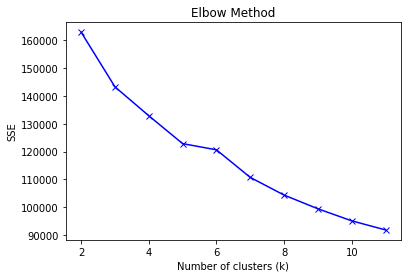

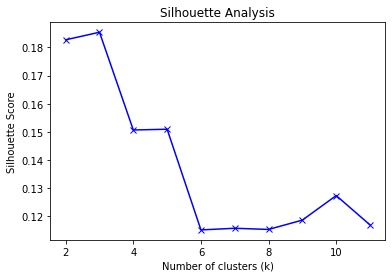

The optimal number of clusters is 3


C:\Users\jay_g\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\jay_g\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


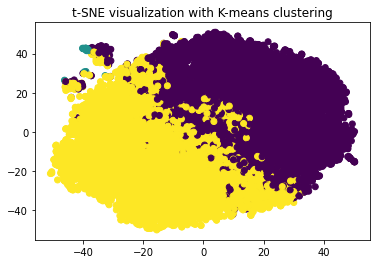

The silhouetter score with 2 clusters is 0.1827332766707052
The silhouetter score with 3 clusters is 0.18542411420690877
The silhouetter score with 4 clusters is 0.1506476310522139
The silhouetter score with 5 clusters is 0.1509234267037162
The silhouetter score with 6 clusters is 0.1150973776966162
The silhouetter score with 7 clusters is 0.11568458690754231
The silhouetter score with 8 clusters is 0.11526801646171052
The silhouetter score with 9 clusters is 0.11859349536195078
The silhouetter score with 10 clusters is 0.1273181157347318
The silhouetter score with 11 clusters is 0.11686794171228125


C:\Users\jay_g\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\jay_g\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


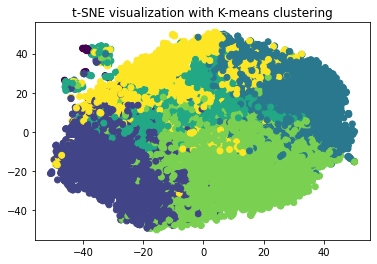

'\n### KMEANS TSNE 7\n# df_standardized is the high-dimensional data\ntsne = TSNE(n_components=2, perplexity=80, random_state=42)\nX_tsne = tsne.fit_transform(df_standardized)\n\n# Cluster the transformed data using K-means, use elbow method and silhouette to determine the optimal number of clusters \nkmeans = KMeans(n_clusters=7, random_state=42)\nlabels = kmeans.fit_predict(df_standardized)\n\n# Plot the transformed data with different colors for each cluster\nplt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)\nplt.title(f"t-SNE visualization with K-means clustering")\nplt.show()\n'

In [3]:
## KMEANS
# Define a range of number of clusters to test
k_range = range(2, 12)

# Initialize empty lists to store the SSE and silhouette scores
sse = []
silhouette_scores = []

# Fit KMeans for each value of k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_standardized)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_standardized, kmeans.labels_))

# Plot the elbow curve
plt.plot(k_range, sse, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

# Plot the silhouette scores
plt.plot(k_range, silhouette_scores, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

# Find the optimal number of clusters based on the highest silhouette score
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"The optimal number of clusters is {optimal_k}")

### KMEANS TSNE 3
# df_standardized is the high-dimensional data
tsne = TSNE(n_components=2, perplexity=80, random_state=42)
X_tsne = tsne.fit_transform(df_standardized)

# Cluster the transformed data using K-means, use elbow method and silhouette to determine the optimal number of clusters 
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(df_standardized)

# Plot the transformed data with different colors for each cluster
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
plt.title(f"t-SNE visualization with K-means clustering")
plt.show()
for k in k_range:
    print(f'The silhouetter score with {k} clusters is {silhouette_scores[k-2]}')

### KMEANS TSNE 6
# df_standardized is the high-dimensional data
tsne = TSNE(n_components=2, perplexity=80, random_state=42)
X_tsne = tsne.fit_transform(df_standardized)

# Cluster the transformed data using K-means, use elbow method and silhouette to determine the optimal number of clusters 
kmeans = KMeans(n_clusters=6, random_state=42)
labels = kmeans.fit_predict(df_standardized)

# Plot the transformed data with different colors for each cluster
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
plt.title(f"t-SNE visualization with K-means clustering")
plt.show()
'''
### KMEANS TSNE 7
# df_standardized is the high-dimensional data
tsne = TSNE(n_components=2, perplexity=80, random_state=42)
X_tsne = tsne.fit_transform(df_standardized)

# Cluster the transformed data using K-means, use elbow method and silhouette to determine the optimal number of clusters 
kmeans = KMeans(n_clusters=7, random_state=42)
labels = kmeans.fit_predict(df_standardized)

# Plot the transformed data with different colors for each cluster
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
plt.title(f"t-SNE visualization with K-means clustering")
plt.show()
'''

In [21]:
for k in [2,3,6,7]:
    kmeans_train_df=df_standardized.copy()
    kmeans_test_df=test_df.copy()
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_standardized)
    for df in [kmeans_train_df, kmeans_test_df]:
        labels = kmeans.predict(df)
        print(set(labels))
        df['cluster_kmeans'] = labels
        if df is kmeans_train_df:
            df.to_csv(f'Train {k}Kmeans.csv', index=False)  
        else:
            df.to_csv(f'Test {k}Kmeans.csv', index=False)  
    

{0, 1}
{0, 1}
{0, 1, 2}
{0, 1, 2}
{0, 1, 2, 3, 4, 5}
{0, 2, 3}
{0, 1, 2, 3, 4, 5, 6}
{1, 2, 5}


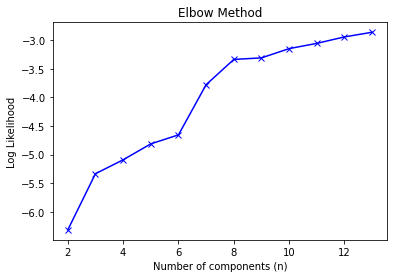

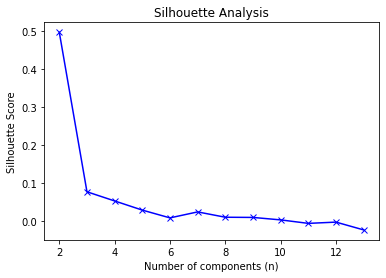

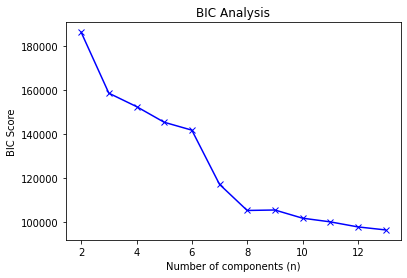

The optimal number of clusters is 13


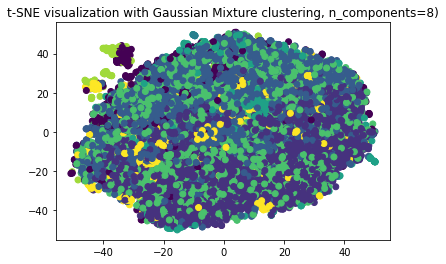

The bic score with 2 components is 186227.8161782238
The bic score with 3 components is 158571.0372640555
The bic score with 4 components is 152486.6006455558
The bic score with 5 components is 145374.96161109017
The bic score with 6 components is 141787.98483218317
The bic score with 7 components is 117187.29883290897
The bic score with 8 components is 105340.68108126422
The bic score with 9 components is 105547.8699800729
The bic score with 10 components is 101836.43630501114
The bic score with 11 components is 100169.97799940509
The bic score with 12 components is 97877.38939643906
The bic score with 13 components is 96508.90133978888


In [5]:
## GAUSSIAN MIXTURE
# Define a range of number of clusters to test
n_component_range = range(2, 14)

# Initialize empty lists to store the SSE and silhouette scores
log_lik = []
silhouette_scores = []
bic=[]

# Fit KMeans for each value of k
for n in n_component_range:
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(df_standardized)
    log_lik.append(gmm.score(df_standardized))
    silhouette_scores.append(np.mean(silhouette_samples(df_standardized, gmm.predict(df_standardized))))
    bic.append(gmm.bic(df_standardized))

# Plot the elbow curve
plt.plot(n_component_range, log_lik, 'bx-')
plt.xlabel('Number of components (n)')
plt.ylabel('Log Likelihood')
plt.title('Elbow Method')
plt.show()

# Plot the silhouette scores
plt.plot(n_component_range, silhouette_scores, 'bx-')
plt.xlabel('Number of components (n)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

# Plot the BICs
plt.plot(n_component_range, bic, 'bx-')
plt.xlabel('Number of components (n)')
plt.ylabel('BIC Score')
plt.title('BIC Analysis')
plt.show()

# Find the optimal number of clusters based on the highest silhouette score
optimal_n = n_component_range[np.argmin(bic)]
print(f"The optimal number of clusters is {optimal_n}")

# Cluster the transformed data using Gaussian Mixture
gmm = GaussianMixture(n_components=8, random_state=42)
labels = gmm.fit_predict(df_standardized)

# Plot the transformed data with different colors for each cluster
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
plt.title(f"t-SNE visualization with Gaussian Mixture clustering, n_components={8})")
plt.show()
for n in n_component_range:
    print(f'The bic score with {n} components is {bic[n-2]}')


In [8]:
for n in [2,3,5, 8]:
    gaus_train_df=df_standardized.copy()
    gaus_test_df=test_df.copy()
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(df_standardized)
    for df in [gaus_train_df, gaus_test_df]:
        labels = gmm.predict(df)
        print(set(labels))
        df['cluster_ncomponents'] = labels
        if df is gaus_train_df:
            df.to_csv(f'Train {n}GMM.csv', index=False)  
        else:
            df.to_csv(f'Test {n}GMM.csv', index=False)  

{0, 1}
{0}
{0, 1, 2}
{0, 1}
{0, 1, 2, 3, 4}
{3, 4}
{0, 1, 2, 3, 4, 5, 6, 7}
{0, 6, 7}


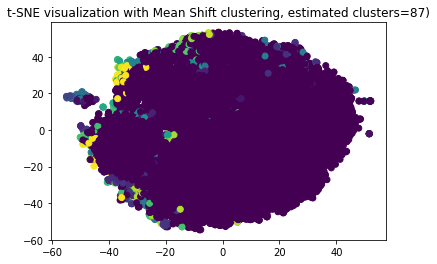

In [6]:
### MEAN SHIFT

# Estimate the bandwidth parameter for Mean Shift
bandwidth = estimate_bandwidth(df_standardized, quantile=0.2, n_samples=500)

# Cluster the transformed data using Mean Shift
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
labels = ms.fit_predict(df_standardized)
n_clusters_ = len(np.unique(labels))

# Plot the transformed data with different colors for each cluster
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels)
plt.title(f"t-SNE visualization with Mean Shift clustering, estimated clusters={n_clusters_})")
plt.show() # MEAN SHIFT PRODUCES BAD CLUSTERS WHATEVER BANDWIDTH IS CHOSEN
